<a href="https://colab.research.google.com/github/chathuray/Mini-Research-Project/blob/main/DAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1485.9495
Epoch 2/100
1/1 [==============================] - 1s 951ms/step - loss: -837.8070
Epoch 3/100
1/1 [==============================] - 1s 760ms/step - loss: -840.0822
Epoch 4/100
1/1 [==============================] - 1s 757ms/step - loss: -877.8211
Epoch 5/100
1/1 [==============================] - 1s 757ms/step - loss: -2343.8650
Epoch 6/100
1/1 [==============================] - 1s 768ms/step - loss: -2546.2083
Epoch 7/100
1/1 [==============================] - 1s 775ms/step - loss: -2546.2205
Epoch 8/100
1/1 [==============================] - 1s 764ms/step - loss: -2553.3157
Epoch 9/100
1/1 [==============================] - 1s 753ms/step - loss: -2559.7456
Epoch 10/100
1/1 [==============================] - 1s 868ms/step - loss: -2559.7456
Epoch 11/100
1/1 [===================

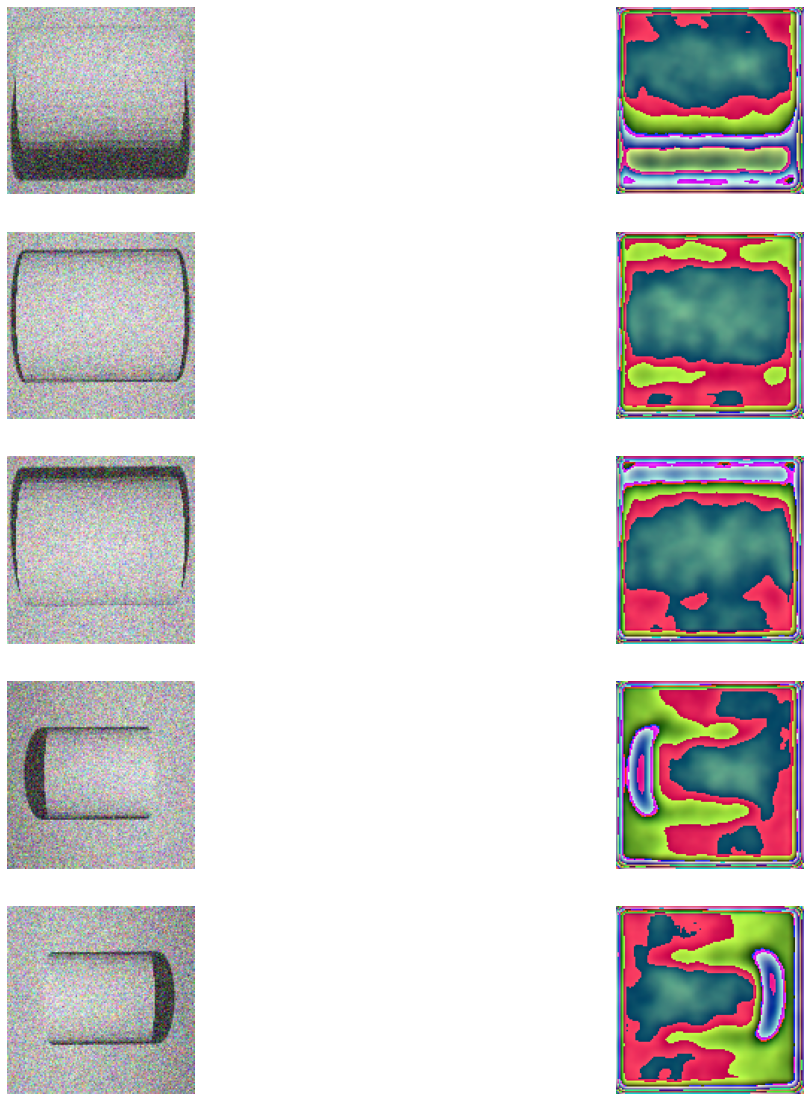

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the noisy images
noisy_images = []
for i in range(5):
    path = "/content/drive/MyDrive/Colab Notebooks/data/GNmines/" + str(i) + ".png"
    noisy_image = tf.keras.preprocessing.image.load_img(path)
    noisy_image = tf.keras.preprocessing.image.img_to_array(noisy_image)
    noisy_image = tf.image.resize(noisy_image, (126, 126))
    noisy_images.append(noisy_image)

noisy_images = np.array(noisy_images)

# Build the DAE model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(126, 126, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(3, (3,3), activation='relu', padding='same') #sigmoid, linear, Tanh, Leaky ReLU, Softmax
])

model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the DAE
"""
An epoch is a single iteration through all the training data during the training of a neural network. 
Think of it as one complete run of training a model on the entire dataset. 
The number of epochs determines how many times the model will see and learn from the training data.

"""
model.fit(noisy_images, noisy_images, epochs=100) # 20 and 50 were not enough 

denoised_images = model.predict(noisy_images)

fig, axs = plt.subplots(5, 2, figsize=(20, 20))
for i in range(5):
    axs[i, 0].imshow(noisy_images[i].astype(np.uint8))
    axs[i, 0].axis('off')
    axs[i, 1].imshow(denoised_images[i].astype(np.uint8))
    axs[i, 1].axis('off')

plt.show()
